Importing the needful libraries

In [ ]:
import numpy as np
import random
import gym
import matplotlib.pyplot as plt

Creating the environment

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


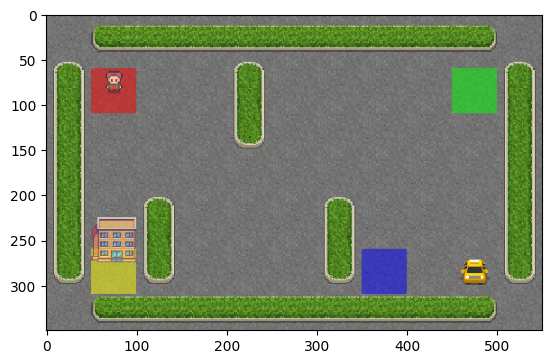

In [ ]:
environment = gym.make('Taxi-v3').env
environment.reset()
fig, ax = plt.subplots(1,1)
ax.imshow(environment.render(mode='rgb_array'))
plt.show()


Number of states and actions

In [ ]:
state = environment.observation_space.n
action = environment.action_space.n
print(state,action)

500 6


setting the values to the learning rate,discount and epsilon

In [ ]:
#set lr- how quickly agent learning , if it is low agent learn well and focus about more rewards
#gamma - discount factor determines the importance of future reward in the agent decision making process
alpha = 0.1
gamma = 0.6
epsilon= 0.1

In [ ]:
#initial q table
q_table = np.zeros((state,action))
print(q_table)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
#train Q table
num_of_epi = 100000

for epoch in range (0,num_of_epi):
  state = environment.reset()

  reward = 0
  terminated = False

  while not terminated:
    if random.uniform(0,1) < epsilon:
      action = environment.action_space.sample()
      print("action in if :",action)
    else:
      action = np.argmax(q_table[state])
      print("action in else :",action)

    #take action
    next_state,reward,terminated,info = environment.step(action)
    print(f"next_state: {next_state}, reward: {reward}, terminated: {terminated}, info: {info}")

    q_value = q_table[state,action]
    max_value = np.max(q_table[next_state])
    new_q_value = (1-alpha)*q_value + alpha*(reward + gamma*max_value)

    q_table[state,action] = new_q_value
    print(f"new q value table: {q_table[state,action]}")
    state = next_state
    print(f"new state: {next_state}")




action in else : 0
next_state: 424, reward: -1, terminated: False, info: {'prob': 1.0, 'action_mask': array([0, 1, 1, 0, 0, 0], dtype=int8)}
new q value table: -0.1
new state: 424
action in else : 0
next_state: 424, reward: -1, terminated: False, info: {'prob': 1.0, 'action_mask': array([0, 1, 1, 0, 0, 0], dtype=int8)}
new q value table: -0.1
new state: 424
action in else : 1
next_state: 324, reward: -1, terminated: False, info: {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)}
new q value table: -0.1
new state: 324
action in else : 1
next_state: 224, reward: -1, terminated: False, info: {'prob': 1.0, 'action_mask': array([1, 1, 1, 1, 0, 0], dtype=int8)}
new q value table: -0.1
new state: 224
action in else : 0
next_state: 324, reward: -1, terminated: False, info: {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)}
new q value table: -0.1
new state: 324
action in else : 2
next_state: 344, reward: -1, terminated: False, info: {'prob': 1.0, 'action_mask'

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Streaming output truncated to the last 5000 lines.
action in else : 0
next_state: 379, reward: -1, terminated: False, info: {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)}
new q value table: 5.599999999999993
new state: 379
action in else : 0
next_state: 479, reward: -1, terminated: False, info: {'prob': 1.0, 'action_mask': array([0, 1, 1, 0, 0, 1], dtype=int8)}
new q value table: 10.999999999999991
new state: 479
action in else : 5
next_state: 475, reward: 20, terminated: True, info: {'prob': 1.0, 'action_mask': array([0, 1, 1, 0, 1, 0], dtype=int8), 'TimeLimit.truncated': False}
new q value table: 19.99999999999999
new state: 475
action in else : 1
next_state: 261, reward: -1, terminated: False, info: {'prob': 1.0, 'action_mask': array([1, 1, 1, 1, 0, 0], dtype=int8)}
new q value table: -2.4894208378470393
new state: 261
action in else : 3
next_state: 241, reward: -1, terminated: False, info: {'prob': 1.0, 'action_mask': array([1, 1, 1, 1, 0, 0], dtype=int8)}
new 

In [ ]:
print(q_table)

[[  0.           0.           0.           0.           0.
    0.        ]
 [ -2.41837065  -2.36395107  -2.41837065  -2.3639511   -2.27325184
  -11.36395065]
 [ -1.87014395  -1.45024007  -1.87014399  -1.45024006  -0.7504
  -10.45023978]
 ...
 [ -1.19525945   0.415999    -1.12242881  -1.29908382  -3.52338506
   -5.6947478 ]
 [ -2.17850618  -2.12204182  -2.15796628  -2.12204574  -6.25610519
   -6.20272488]
 [  3.35431229   0.98720864   1.37471598  11.          -2.84732604
   -2.25208744]]


In [ ]:
#test the goodness of the trained table
total_penalties = 0
num_of_episodes =100

for _ in range(0,num_of_episodes):
  state = environment.reset()
  penalities = 0
  reward = 0

  terminated = False

  while not terminated:
    action = np.argmax(q_table[state])
    state,reward,terminated,info = environment.step(action)

    if reward <= 10:
      penalities += 1
    total_penalties += penalities

In [ ]:
print(total_penalties/num_of_episodes)

11624716893.7
